 Created folder: C:/Users/neha/Documents/stock_data
Extracted ZIP to: C:/Users/neha/Documents/stock_data
 Error processing INFRATEL.csv: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestRegressor.


<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


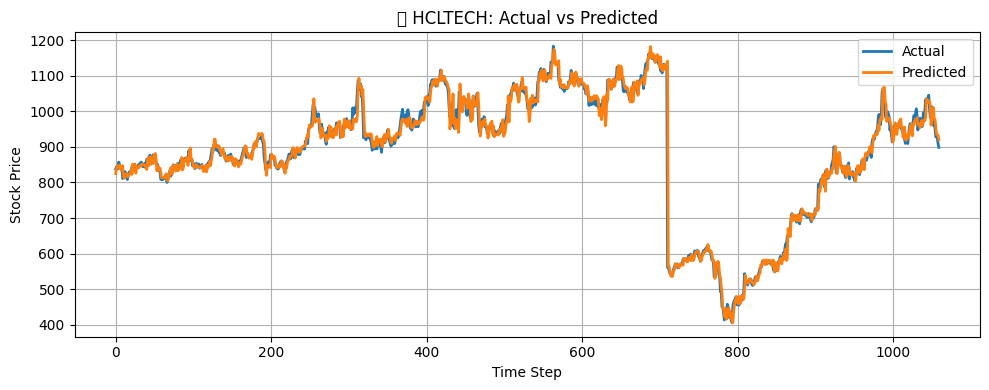

<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


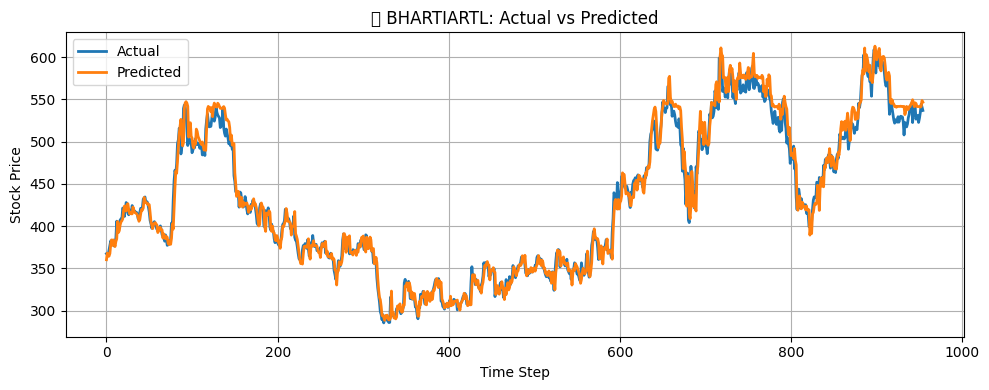

<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


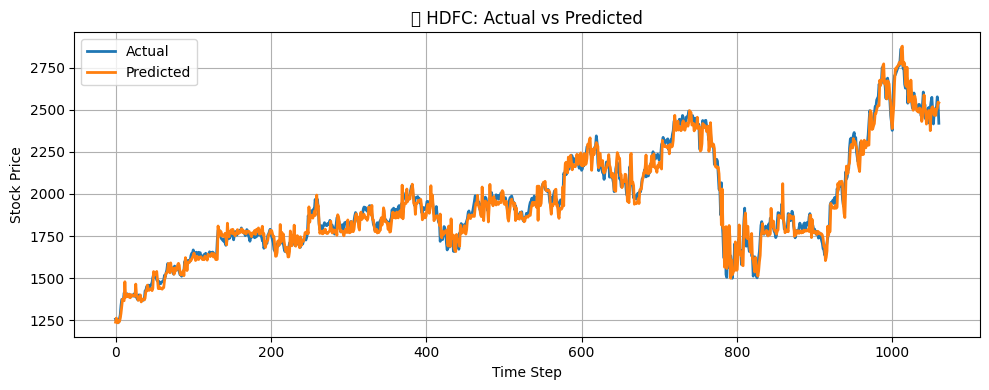

<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


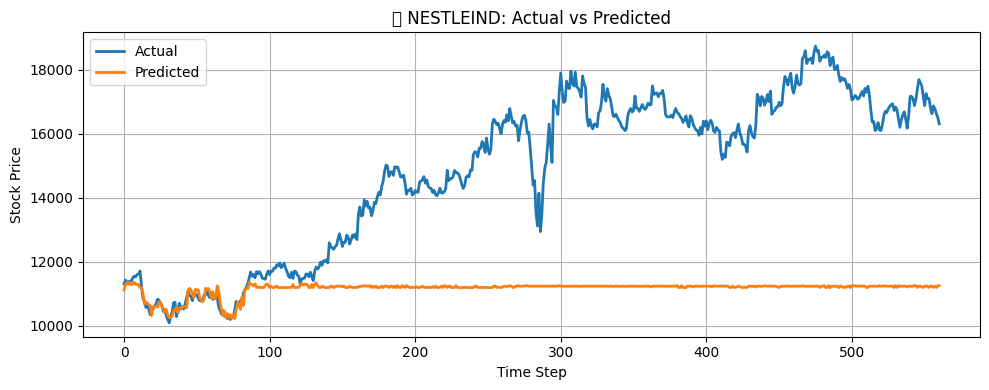

<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


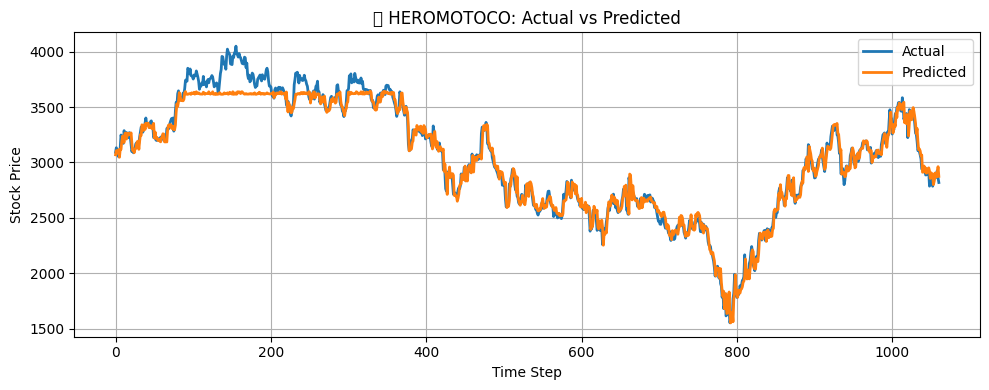

<ipython-input-4-3069a2781d71>:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


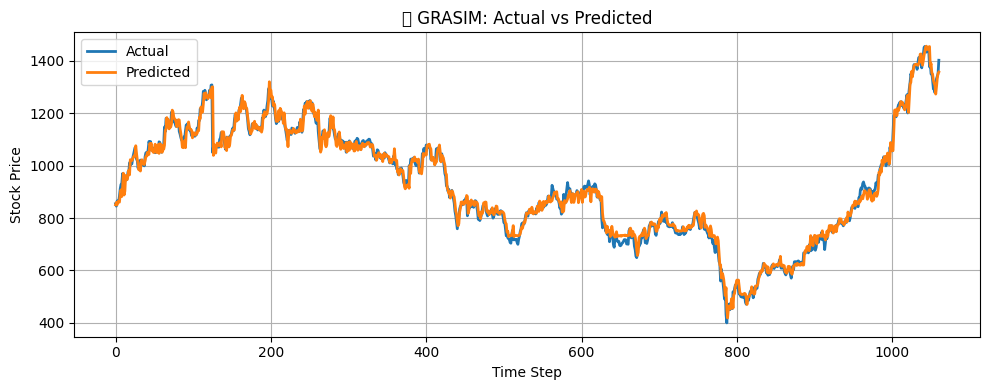


 Model Evaluation Summary:
        Stock     RMSE      MAE  R2 Score  Directional Acc. (%)  \
0      GRASIM    23.58    17.31    0.9882                 49.43   
1     HCLTECH    25.53    14.00    0.9781                 46.93   
2  BHARTIARTL    12.70     9.23    0.9779                 46.54   
3        HDFC    50.46    37.24    0.9738                 52.08   
4  HEROMOTOCO    91.42    63.13    0.9703                 49.53   
5   NESTLEIND  4367.26  3688.14   -2.0868                 46.96   

   Within ±2% Acc. (%)  
0                64.47  
1                73.77  
2                59.37  
3                62.58  
4                61.26  
5                13.37  


<ipython-input-4-3069a2781d71>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_plot.reset_index(), x='Stock', y='RMSE', palette='Blues_r')
<ipython-input-4-3069a2781d71>:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_plot.reset_index(), x='Stock', y='MAE', palette='Greens_r')
<ipython-input-4-3069a2781d71>:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_plot.reset_index(), x='Stock', y='R2 Score', palette='Reds_r')
<ipython-input-4-3069a2781d71>:123: FutureWarning: 

Passing `palette` without 

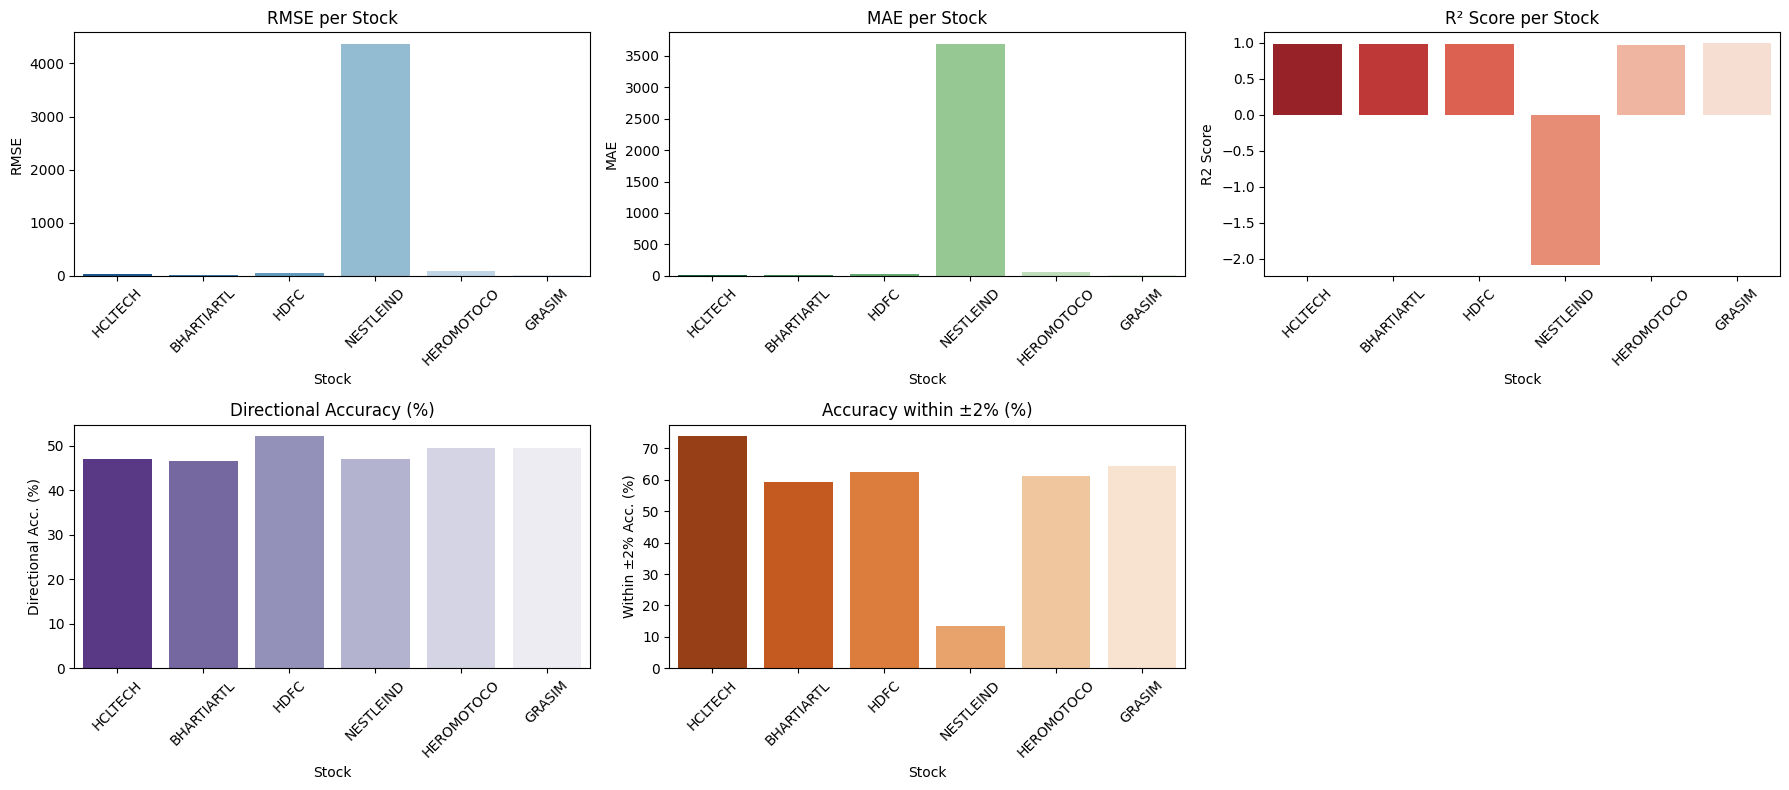

In [4]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Step 1: Create extraction folder ===
extract_dir = "C:/Users/neha/Documents/stock_data"

if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)
    print(f" Created folder: {extract_dir}")
else:
    print(f" Folder already exists: {extract_dir}")

# === Step 2: Unzip the archive ===
zip_path = "/content/archive (2).zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)
    print(f"Extracted ZIP to: {extract_dir}")

# === Step 3: Process the first 7 stock CSVs ===
stock_files = [f for f in os.listdir(extract_dir) if f.endswith('.csv') and f != 'stock_metadata.csv']
results = []

for file in stock_files[:7]:  # First 7 files
    file_path = os.path.join(extract_dir, file)
    try:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        df.sort_values('Date', inplace=True)

        features = ['Open', 'High', 'Low', 'Close', 'Volume']
        df = df[features].copy()
        df['Target'] = df['Close'].shift(-1)
        df.dropna(inplace=True)

        X = df[features]
        y = df['Target']

        split_index = int(len(df) * 0.8)
        X_train, X_test = X[:split_index], X[split_index:]
        y_train, y_test = y[:split_index], y[split_index:]

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # === Evaluation Metrics ===
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Directional Accuracy
        direction_actual = np.sign(np.array(y_test.values[1:]) - np.array(y_test.values[:-1]))
        direction_pred = np.sign(np.array(y_pred[1:]) - np.array(y_pred[:-1]))
        directional_accuracy = np.mean(direction_actual == direction_pred)

        # Tolerance Accuracy (within ±2%)
        tolerance = 0.02
        relative_error = np.abs((y_test - y_pred) / y_test)
        tolerance_accuracy = np.mean(relative_error < tolerance)

        # Append results
        results.append({
            'Stock': file.replace('.csv', ''),
            'RMSE': round(rmse, 2),
            'MAE': round(mae, 2),
            'R2 Score': round(r2, 4),
            'Directional Acc. (%)': round(directional_accuracy * 100, 2),
            'Within ±2% Acc. (%)': round(tolerance_accuracy * 100, 2)
        })

        # === Plot Actual vs Predicted ===
        plt.figure(figsize=(10, 4))
        plt.plot(y_test.values, label='Actual', linewidth=2)
        plt.plot(y_pred, label='Predicted', linewidth=2)
        plt.title(f" {file.replace('.csv', '')}: Actual vs Predicted")
        plt.xlabel("Time Step")
        plt.ylabel("Stock Price")
        plt.legend()
        plt.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f" Error processing {file}: {e}")

# === Step 4: Summary Table ===
results_df = pd.DataFrame(results)
print("\n Model Evaluation Summary:")
print(results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True))

# === Step 5: Plot Metrics for All Stocks ===
plt.figure(figsize=(18, 8))
results_plot = results_df.set_index('Stock')

# RMSE
plt.subplot(2, 3, 1)
sns.barplot(data=results_plot.reset_index(), x='Stock', y='RMSE', palette='Blues_r')
plt.title('RMSE per Stock')
plt.xticks(rotation=45)

# MAE
plt.subplot(2, 3, 2)
sns.barplot(data=results_plot.reset_index(), x='Stock', y='MAE', palette='Greens_r')
plt.title('MAE per Stock')
plt.xticks(rotation=45)

# R2 Score
plt.subplot(2, 3, 3)
sns.barplot(data=results_plot.reset_index(), x='Stock', y='R2 Score', palette='Reds_r')
plt.title('R² Score per Stock')
plt.xticks(rotation=45)

# Directional Accuracy
plt.subplot(2, 3, 4)
sns.barplot(data=results_plot.reset_index(), x='Stock', y='Directional Acc. (%)', palette='Purples_r')
plt.title('Directional Accuracy (%)')
plt.xticks(rotation=45)

# Tolerance Accuracy
plt.subplot(2, 3, 5)
sns.barplot(data=results_plot.reset_index(), x='Stock', y='Within ±2% Acc. (%)', palette='Oranges_r')
plt.title('Accuracy within ±2% (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()